In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("odi_Batting_Card.csv")
df.head()

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,wicketType,fielders,bowler
0,64381,1,Sri Lanka,1810.0,5.0,17.0,0.0,0.0,29.41,True,lbw,NaN,NaN
1,64357,1,Pakistan,1981.0,35.0,48.0,2.0,0.0,72.91,True,caught,['1977'],NaN
2,65455,1,Australia,1922.0,16.0,30.0,1.0,0.0,53.33,True,caught,['1945'],NaN
3,64381,1,Sri Lanka,1987.0,6.0,46.0,0.0,0.0,13.04,True,caught,['1980'],NaN
4,64357,1,Pakistan,1750.0,114.0,123.0,14.0,0.0,92.68,True,run out,NaN,NaN


In [14]:
df.shape
df.columns
df.tail(5)

Index(['Match ID', 'innings', 'team', 'batsman', 'runs', 'balls', 'fours',
       'sixes', 'strikeRate', 'isOut', 'wicketType', 'fielders', 'bowler',
       'century'],
      dtype='object')

In [32]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103225 entries, 0 to 103224
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Match ID    103225 non-null  int64  
 1   innings     103225 non-null  int64  
 2   team        103213 non-null  object 
 3   batsman     103213 non-null  float64
 4   runs        83039 non-null   float64
 5   balls       83039 non-null   float64
 6   fours       82567 non-null   float64
 7   sixes       82618 non-null   float64
 8   strikeRate  83039 non-null   float64
 9   isOut       103213 non-null  object 
 10  wicketType  103213 non-null  object 
 11  fielders    60791 non-null   object 
 12  bowler      40939 non-null   float64
 13  century     103225 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 11.0+ MB
None


,Match ID,innings,batsman,runs,balls,fours,sixes,strikeRate,bowler,century
count,1.032250e+05,103225.000000,103213.000000,83039.000000,83039.000000,82567.000000,82618.000000,83039.000000,40939.000000,103225.000000
mean,4.337959e+05,1.494938,24378.416934,22.965149,30.380941,2.010137,0.322024,68.082163,38563.076577,0.020470
std,4.579302e+05,0.499977,27714.545828,26.685187,30.331139,2.755340,0.863357,46.340819,28187.226445,0.141602
min,6.414800e+04,1.000000,858.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1383.000000,0.000000
25%,6.533100e+04,1.000000,2030.000000,4.000000,8.000000,0.000000,0.000000,38.880000,8270.000000,0.000000
50%,2.382080e+05,1.000000,7678.000000,13.000000,20.000000,1.000000,0.000000,65.670000,47023.000000,0.000000
75%,7.279230e+05,2.000000,48739.000000,33.000000,44.000000,3.000000,0.000000,91.575000,58435.000000,0.000000
max,1.421073e+06,2.000000,116530.000000,264.000000,201.000000,33.000000,17.000000,600.000000,115381.000000,1.000000


In [11]:
df['century'] = (df['runs'] >= 100).astype(int)
df['century'].value_counts()

century
0    101112
1      2113
Name: count, dtype: int64

In [15]:
X = df[['balls','fours','sixes','strikeRate']]
y = df['century']

In [19]:
X.isnull().sum()

balls         20186
fours         20658
sixes         20607
strikeRate    20186
dtype: int64

In [22]:
X = X.fillna(X.mean())

In [23]:
print(X.isnull().sum())

balls         0
fours         0
sixes         0
strikeRate    0
dtype: int64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [35]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = acc
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


KNN Accuracy: 0.9989
Naive Bayes Accuracy: 0.9672
Decision Tree Accuracy: 0.9989


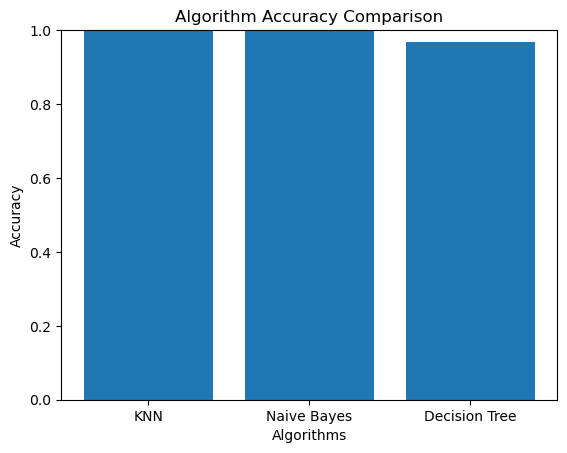

In [38]:
names = list(accuracies.keys())
values = list(accuracies.values())

plt.figure()
plt.bar(names, values)
plt.title("Algorithm Accuracy Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

In [27]:
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train, y_train)


KNeighborsClassifier()

## Prediction of Century

In [28]:

balls = float(input("Enter balls faced: "))
fours = float(input("Enter number of fours: "))
sixes = float(input("Enter number of sixes: "))
strikeRate = float(input("Enter strike rate: "))

new_data = pd.DataFrame({
    "balls": [balls],
    "fours": [fours],
    "sixes": [sixes],
    "strikeRate": [strikeRate]
})

print(new_data)

prediction = best_model.predict(new_data)

if prediction[0] == 1:
    print("Kohli ki Century aayegi..............")
else:
    print("Kohli ki Century nahi aayegi...............")


Enter balls faced:  80
Enter number of fours:  9
Enter number of sixes:  3
Enter strike rate:  110


   balls  fours  sixes  strikeRate
0   80.0    9.0    3.0       110.0
Kohli ki Century nahi aayegi...............


In [29]:
prob = best_model.predict_proba(new_data)
print("Probability:", prob)


Probability: [[1. 0.]]
